Analisis de datos nulos

In [79]:
import pandas as pd
import io
#from os import scandir, getcwd, open
import os
import matplotlib.pyplot as plt

In [80]:
def ls(ruta = "./Datasets"):
    return [arch.name for arch in os.scandir(ruta) if arch.is_file()]

In [81]:
archivos = ls()
archivos = archivos[1:]
print(archivos)

['Clientes.csv', 'Compra.csv', 'Gasto.csv', 'Localidades.csv', 'Proveedores.csv', 'Sucursales.csv', 'TiposDeGasto.csv', 'Venta.csv']


In [82]:
ruta = "./Datasets/"
for i in archivos:
    print(ruta+i)

./Datasets/Clientes.csv
./Datasets/Compra.csv
./Datasets/Gasto.csv
./Datasets/Localidades.csv
./Datasets/Proveedores.csv
./Datasets/Sucursales.csv
./Datasets/TiposDeGasto.csv
./Datasets/Venta.csv


In [83]:
#archivo = open('Emisiones_CO2.csv', 'r', encoding='utf-8')
data = []
codificacion = ['utf-8','utf-8','utf-8','utf-8','ANSI','utf-8','utf-8','utf-8']
u = 0
for i in archivos:
    r = ruta+i
    g = open(r,encoding=codificacion[u])
    n = 1
    for i in g:
        print(i)
        if ',' in i:
            #print('Delimiter coma')
            data.append(pd.read_csv(r,encoding=codificacion[u]))
        else:
            #print('delimiter punto y coma')
            data.append(pd.read_csv(r,delimiter=';',encoding=codificacion[u]))
        break
    #print(u,r)
    g.close()
    u+=1

ID;Provincia;Nombre_y_Apellido;Domicilio;Telefono;Edad;Localidad;X;Y;col10

IdCompra,Fecha,Fecha_Año,Fecha_Mes,Fecha_Periodo,IdProducto,Cantidad,Precio,IdProveedor

IdGasto,IdSucursal,IdTipoGasto,Fecha,Monto

﻿categoria,centroide_lat,centroide_lon,departamento_id,departamento_nombre,fuente,id,localidad_censal_id,localidad_censal_nombre,municipio_id,municipio_nombre,nombre,provincia_id,provincia_nombre

IDProveedor,Nombre,Address,City,State,Country,departamen

﻿ID;Sucursal;Direccion;Localidad;Provincia;Latitud;Longitud

IdTipoGasto,Descripcion,Monto_Aproximado

IdVenta,Fecha,Fecha_Entrega,IdCanal,IdCliente,IdSucursal,IdEmpleado,IdProducto,Precio,Cantidad



In [84]:
data[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2384 entries, 0 to 2383
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2384 non-null   int64  
 1   Provincia          2359 non-null   object 
 2   Nombre_y_Apellido  2365 non-null   object 
 3   Domicilio          2341 non-null   object 
 4   Telefono           2353 non-null   object 
 5   Edad               2384 non-null   int64  
 6   Localidad          2359 non-null   object 
 7   X                  2330 non-null   object 
 8   Y                  2332 non-null   object 
 9   col10              0 non-null      float64
dtypes: float64(1), int64(2), object(7)
memory usage: 186.4+ KB


In [85]:
data[0].shape[0]

2384

In [86]:
buffer = io.StringIO()
data[0].info(buf=buffer)
lines = buffer.getvalue().splitlines()
nulls = (pd.DataFrame([x.split() for x in lines[5:-2]], columns=lines[3].split())
       .drop('Count',axis=1))
nulls['Entries'] = data[0].shape[0]
nulls['Tabla'] = archivos[0]
print(nulls)

   #             Column Non-Null    Dtype  Entries         Tabla
0  0                 ID     2384    int64     2384  Clientes.csv
1  1          Provincia     2359   object     2384  Clientes.csv
2  2  Nombre_y_Apellido     2365   object     2384  Clientes.csv
3  3          Domicilio     2341   object     2384  Clientes.csv
4  4           Telefono     2353   object     2384  Clientes.csv
5  5               Edad     2384    int64     2384  Clientes.csv
6  6          Localidad     2359   object     2384  Clientes.csv
7  7                  X     2330   object     2384  Clientes.csv
8  8                  Y     2332   object     2384  Clientes.csv
9  9              col10        0  float64     2384  Clientes.csv


In [87]:
i = False
k = 1
for df in data:
    print(k)
    print(archivos[k])
    if i:
        
        buffer = io.StringIO()
        df.info(buf=buffer)
        lines = buffer.getvalue().splitlines()
        meta_data = (pd.DataFrame([x.split() for x in lines[5:-2]], columns=lines[3].split())
            .drop('Count',axis=1))
        meta_data['Entries'] = df.shape[0]
        meta_data['Tabla'] = archivos[k]
        nulls = pd.concat([nulls, meta_data])
        #print(meta_data)
        k+=1
        pass
    i = True


1
Compra.csv
1
Compra.csv
2
Gasto.csv
3
Localidades.csv
4
Proveedores.csv
5
Sucursales.csv
6
TiposDeGasto.csv
7
Venta.csv


In [88]:
nulls

,#,Column,Non-Null,Dtype,Entries,Tabla
0,0,ID,2384,int64,2384,Clientes.csv
1,1,Provincia,2359,object,2384,Clientes.csv
2,2,Nombre_y_Apellido,2365,object,2384,Clientes.csv
3,3,Domicilio,2341,object,2384,Clientes.csv
4,4,Telefono,2353,object,2384,Clientes.csv
...,...,...,...,...,...,...
5,5,IdSucursal,46180,int64,46180,Venta.csv
6,6,IdEmpleado,46180,int64,46180,Venta.csv
7,7,IdProducto,46180,int64,46180,Venta.csv
8,8,Precio,45260,float64,46180,Venta.csv


In [89]:
nulls.Tabla.unique()

array(['Clientes.csv', 'Compra.csv', 'Gasto.csv', 'Localidades.csv',
       'Proveedores.csv', 'Sucursales.csv', 'TiposDeGasto.csv',
       'Venta.csv'], dtype=object)

In [90]:
nulls['Non-Null'] = nulls['Non-Null'].astype(int)
nulls.drop(columns=['#'], inplace=True)


In [91]:
nulls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 0 to 9
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Column    65 non-null     object
 1   Non-Null  65 non-null     int32 
 2   Dtype     65 non-null     object
 3   Entries   65 non-null     int64 
 4   Tabla     65 non-null     object
dtypes: int32(1), int64(1), object(3)
memory usage: 2.8+ KB


In [92]:
nulls['Porcentaje'] = nulls['Non-Null']/nulls['Entries']

In [93]:
nulls.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Column      65 non-null     object 
 1   Non-Null    65 non-null     int32  
 2   Dtype       65 non-null     object 
 3   Entries     65 non-null     int64  
 4   Tabla       65 non-null     object 
 5   Porcentaje  65 non-null     float64
dtypes: float64(1), int32(1), int64(1), object(3)
memory usage: 3.3+ KB


In [94]:
nulls.head(20)

,Column,Non-Null,Dtype,Entries,Tabla,Porcentaje
0,ID,2384,int64,2384,Clientes.csv,1.000000
1,Provincia,2359,object,2384,Clientes.csv,0.989513
2,Nombre_y_Apellido,2365,object,2384,Clientes.csv,0.992030
3,Domicilio,2341,object,2384,Clientes.csv,0.981963
4,Telefono,2353,object,2384,Clientes.csv,0.986997
5,Edad,2384,int64,2384,Clientes.csv,1.000000
6,Localidad,2359,object,2384,Clientes.csv,0.989513
7,X,2330,object,2384,Clientes.csv,0.977349
8,Y,2332,object,2384,Clientes.csv,0.978188
9,col10,0,float64,2384,Clientes.csv,0.000000


In [95]:
data[0][data[0].Nombre_y_Apellido.isnull() == True]

,ID,Provincia,Nombre_y_Apellido,Domicilio,Telefono,Edad,Localidad,X,Y,col10
1000,1082,Buenos Aires,NaN,BELIERA Y RUTA 26 KM 5 S/N,48-3120,21,MAQUINISTA SAVIO,"-58,77632327","-34,410096",NaN
1250,1333,Buenos Aires,NaN,LOS ROBLES E/JACARANDAES Y P.BORRACHOS 108 PA...,4283-4029,60,LOMAS DE ZAMORA,"-58,43154139","-34,76525411",NaN
1255,1338,Buenos Aires,NaN,AVENIDA HIPOLITO YRIGOYEN Y LARROQUE 7672,4242-0635,23,BANDFIELD,"-58,39912494","-34,74451518",NaN
1277,1360,Buenos Aires,NaN,L.DE LA TORRE E/GAONA E INGENIEROS 2264,4283-1479,54,BANDFIELD,"-58,4384484","-34,74820016",NaN
1307,1390,Buenos Aires,NaN,AZAMOR E/ LARRAZABAL Y MJURATURE 297,4276-2010,16,VILLA FIORITO,"-58,44269873","-34,70083958",NaN
1523,1618,Buenos Aires,NaN,RODRIGUEZ PEÃ?A 145 MERLO NORTE,482-1483,47,MERLO,"-58,7329899","-34,66218051",NaN
1654,1749,Buenos Aires,NaN,RIO LUJAN - VILLA IRSA - CUARTEL V S/N RIO LU...,48-4266,33,BENAVIDEZ,"-58,6481981","-34,37827137",NaN
1669,1764,Buenos Aires,NaN,7 Y 643 S/N VILLA GARIBALDI,491-0615,55,VILLA ELVIRA,"-57,86410071","-34,97950576",NaN
1758,1853,Buenos Aires,NaN,CUARTEL III S/N PARAJE SAMBOROMBON,15-67-0706,45,SAMBOROMBON,"-58,28306176","-35,22079921",NaN
1761,1856,Buenos Aires,NaN,CHIRAMBERRO Y SARMIENTO 489,49-1120,30,LOMA VERDE,"-58,40544324","-35,27514719",NaN


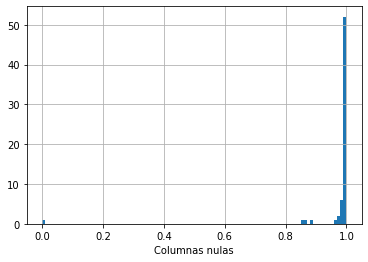

In [17]:
plt.hist(nulls.Porcentaje, bins= 100)
plt.xlabel('Columnas nulas')
plt.grid()
plt.show()

In [18]:
nulls[nulls.Porcentaje < 0.9]

,Column,Non-Null,Dtype,Entries,Tabla,Porcentaje
9,col10,0,float64,2384,Clientes.csv,0.000000
9,municipio_id,3599,float64,4142,Localidades.csv,0.868904
10,municipio_nombre,3648,object,4142,Localidades.csv,0.880734
1,Nombre,12,object,14,Proveedores.csv,0.857143


Resetear los indices

In [19]:
nulls = nulls.reset_index()

In [20]:
nulls[nulls['Column'] == 'col10']

,index,Column,Non-Null,Dtype,Entries,Tabla,Porcentaje
9,9,col10,0,float64,2384,Clientes.csv,0.0


In [21]:
nulls.drop(nulls[nulls['Column'] == 'col10'].index, inplace=True)

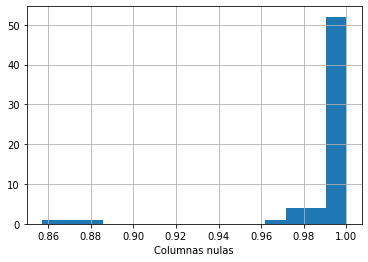

In [22]:
plt.hist(nulls.Porcentaje, bins= 15)
plt.xlabel('Columnas nulas')
plt.grid()
plt.show()

Tablas para analizar

In [23]:
nulls[nulls.Porcentaje < 1]

,index,Column,Non-Null,Dtype,Entries,Tabla,Porcentaje
1,1,Provincia,2359,object,2384,Clientes.csv,0.989513
2,2,Nombre_y_Apellido,2365,object,2384,Clientes.csv,0.992030
3,3,Domicilio,2341,object,2384,Clientes.csv,0.981963
4,4,Telefono,2353,object,2384,Clientes.csv,0.986997
6,6,Localidad,2359,object,2384,Clientes.csv,0.989513
7,7,X,2331,object,2384,Clientes.csv,0.977768
8,8,Y,2332,object,2384,Clientes.csv,0.978188
17,7,Precio,11172,float64,11539,Compra.csv,0.968195
27,3,departamento_id,4141,float64,4142,Localidades.csv,0.999759
28,4,departamento_nombre,4141,object,4142,Localidades.csv,0.999759


In [24]:
archivos

['Clientes.csv',
 'Compra.csv',
 'Gasto.csv',
 'Localidades.csv',
 'Proveedores.csv',
 'Sucursales.csv',
 'TiposDeGasto.csv',
 'Venta.csv']

Analizamos la tabla 'Clientes'

In [25]:
clientes = data[0]

In [26]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2384 entries, 0 to 2383
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2384 non-null   int64  
 1   Provincia          2359 non-null   object 
 2   Nombre_y_Apellido  2365 non-null   object 
 3   Domicilio          2341 non-null   object 
 4   Telefono           2353 non-null   object 
 5   Edad               2384 non-null   int64  
 6   Localidad          2359 non-null   object 
 7   X                  2331 non-null   object 
 8   Y                  2332 non-null   object 
 9   col10              0 non-null      float64
dtypes: float64(1), int64(2), object(7)
memory usage: 186.4+ KB


In [27]:
clientes.drop('col10',axis=1, inplace=True)

In [28]:
nulls[nulls.Tabla == 'Clientes.csv']

,index,Column,Non-Null,Dtype,Entries,Tabla,Porcentaje
0,0,ID,2384,int64,2384,Clientes.csv,1.000000
1,1,Provincia,2359,object,2384,Clientes.csv,0.989513
2,2,Nombre_y_Apellido,2365,object,2384,Clientes.csv,0.992030
3,3,Domicilio,2341,object,2384,Clientes.csv,0.981963
4,4,Telefono,2353,object,2384,Clientes.csv,0.986997
5,5,Edad,2384,int64,2384,Clientes.csv,1.000000
6,6,Localidad,2359,object,2384,Clientes.csv,0.989513
7,7,X,2331,object,2384,Clientes.csv,0.977768
8,8,Y,2332,object,2384,Clientes.csv,0.978188


In [29]:
clientes[clientes.Nombre_y_Apellido.isnull()]

,ID,Provincia,Nombre_y_Apellido,Domicilio,Telefono,Edad,Localidad,X,Y
1000,1082,Buenos Aires,NaN,BELIERA Y RUTA 26 KM 5 S/N,48-3120,21,MAQUINISTA SAVIO,"-58,77632327","-34,410096"
1250,1333,Buenos Aires,NaN,LOS ROBLES E/JACARANDAES Y P.BORRACHOS 108 PA...,4283-4029,60,LOMAS DE ZAMORA,"-58,43154139","-34,76525411"
1255,1338,Buenos Aires,NaN,AVENIDA HIPOLITO YRIGOYEN Y LARROQUE 7672,4242-0635,23,BANDFIELD,"-58,39912494","-34,74451518"
1277,1360,Buenos Aires,NaN,L.DE LA TORRE E/GAONA E INGENIEROS 2264,4283-1479,54,BANDFIELD,"-58,4384484","-34,74820016"
1307,1390,Buenos Aires,NaN,AZAMOR E/ LARRAZABAL Y MJURATURE 297,4276-2010,16,VILLA FIORITO,"-58,44269873","-34,70083958"
1523,1618,Buenos Aires,NaN,RODRIGUEZ PEÃ?A 145 MERLO NORTE,482-1483,47,MERLO,"-58,7329899","-34,66218051"
1654,1749,Buenos Aires,NaN,RIO LUJAN - VILLA IRSA - CUARTEL V S/N RIO LU...,48-4266,33,BENAVIDEZ,"-58,6481981","-34,37827137"
1669,1764,Buenos Aires,NaN,7 Y 643 S/N VILLA GARIBALDI,491-0615,55,VILLA ELVIRA,"-57,86410071","-34,97950576"
1758,1853,Buenos Aires,NaN,CUARTEL III S/N PARAJE SAMBOROMBON,15-67-0706,45,SAMBOROMBON,"-58,28306176","-35,22079921"
1761,1856,Buenos Aires,NaN,CHIRAMBERRO Y SARMIENTO 489,49-1120,30,LOMA VERDE,"-58,40544324","-35,27514719"


In [30]:
s = clientes.Provincia.isnull()

In [31]:
clientes[clientes.Provincia.isnull()]

,ID,Provincia,Nombre_y_Apellido,Domicilio,Telefono,Edad,Localidad,X,Y
11,12,NaN,EDUARDO VICENTE SARNI,CARLOS TEJEDOR 444 EL PINAR,4480-0769,52,NaN,"-58,57950173","-34,82788055"
14,15,NaN,JESUS EDUARDO SARUTTE,52 Y 235 S/N ESQUINA NEGRA,496-4503,25,NaN,"-58,7461366","-35,3160025"
19,20,NaN,ANDRES ALBERTO SCAGLIOLA,RUTA 15 Y 74 S/N LOS TALAS,462-0411,24,NaN,"-57,80754132","-34,8980234"
186,203,NaN,MERCEDES TRIGO,L. N. ALEM 387,47-7194,31,NaN,"-58,38185254","-34,91321374"
189,206,NaN,SILVANA MARIA TROTTO,GODOY CRUZ Y R. DE ESCALADA S/N BARRIO SAN MA...,47-7952,28,NaN,"-58,3923462","-34,93104911"
724,785,NaN,"Fernandez, Anibal Oscar",22 1338,451-0607,20,NaN,"-57,95322986","-34,9374101"
731,796,NaN,"Real, Victor Hugo",2 BIS Y 515 S/N,471-4086,52,NaN,"-57,98310019","-34,88246253"
738,805,NaN,"Kepa, Carlos D",RUTA 36 Y 529 S/N,491-6025,45,NaN,"-58,6003018","-34,97705791"
752,820,NaN,"Rodriguez, Ruben Osvaldo",7 (ESQ. 32) S/N,422-4898,43,NaN,"-57,96847377","-34,90064659"
777,849,NaN,REINEL ANTONIO ARIZA NIEVES,CHIRIPA Y LA QUERENCIA 623 BARRIO EL GAUCHO,4238-7458,21,NaN,"-58,36957529","-34,81900036"


In [32]:
clientes[clientes.Localidad.isnull()]

,ID,Provincia,Nombre_y_Apellido,Domicilio,Telefono,Edad,Localidad,X,Y
11,12,NaN,EDUARDO VICENTE SARNI,CARLOS TEJEDOR 444 EL PINAR,4480-0769,52,NaN,"-58,57950173","-34,82788055"
14,15,NaN,JESUS EDUARDO SARUTTE,52 Y 235 S/N ESQUINA NEGRA,496-4503,25,NaN,"-58,7461366","-35,3160025"
19,20,NaN,ANDRES ALBERTO SCAGLIOLA,RUTA 15 Y 74 S/N LOS TALAS,462-0411,24,NaN,"-57,80754132","-34,8980234"
186,203,NaN,MERCEDES TRIGO,L. N. ALEM 387,47-7194,31,NaN,"-58,38185254","-34,91321374"
189,206,NaN,SILVANA MARIA TROTTO,GODOY CRUZ Y R. DE ESCALADA S/N BARRIO SAN MA...,47-7952,28,NaN,"-58,3923462","-34,93104911"
724,785,NaN,"Fernandez, Anibal Oscar",22 1338,451-0607,20,NaN,"-57,95322986","-34,9374101"
731,796,NaN,"Real, Victor Hugo",2 BIS Y 515 S/N,471-4086,52,NaN,"-57,98310019","-34,88246253"
738,805,NaN,"Kepa, Carlos D",RUTA 36 Y 529 S/N,491-6025,45,NaN,"-58,6003018","-34,97705791"
752,820,NaN,"Rodriguez, Ruben Osvaldo",7 (ESQ. 32) S/N,422-4898,43,NaN,"-57,96847377","-34,90064659"
777,849,NaN,REINEL ANTONIO ARIZA NIEVES,CHIRIPA Y LA QUERENCIA 623 BARRIO EL GAUCHO,4238-7458,21,NaN,"-58,36957529","-34,81900036"


In [33]:
clientes[clientes.ID == 527]

,ID,Provincia,Nombre_y_Apellido,Domicilio,Telefono,Edad,Localidad,X,Y
479,527,Buenos Aires,"Gimenez Mora, Blas Ignacio",NaN,4768-0607,20,CIUDAD VILLA BALLESTER,NaN,NaN


In [34]:
clientes[clientes.Domicilio.isnull()]

,ID,Provincia,Nombre_y_Apellido,Domicilio,Telefono,Edad,Localidad,X,Y
128,141,Buenos Aires,DORA SZAFIR,NaN,4690-6533,19,RAFAEL CASTILLO,NaN,NaN
462,510,Buenos Aires,"Subieta Alberto THabanEzequiel Martin, AVDA MI...",NaN,4258-2708,50,RANELAGH,"-58,18772879","-34,79008944"
473,521,Buenos Aires,"Tiano Matias NicolasCastelloJuan Ramon, 126 Y ...",NaN,4258-4352,46,BERAZATEGUI OESTE,"-58,22187786","-34,78947082"
479,527,Buenos Aires,"Gimenez Mora, Blas Ignacio",NaN,4768-0607,20,CIUDAD VILLA BALLESTER,NaN,NaN
489,537,Buenos Aires,"Bigatti, Jose",NaN,4720-5675,42,CIUDAD JARDIN DEL LIBERTADOR,NaN,NaN
521,569,Buenos Aires,"Maldonado, Bernardo",NaN,4284-1547,50,MONTE GRANDE,NaN,NaN
563,612,Buenos Aires,"Sanchez, Raul Angel",NaN,4755-0793,64,VILLA MAIPU,NaN,NaN
579,628,Buenos Aires,"Usarralde, Juan Martin",NaN,4713-2859,44,PARQUE SAN LORENZO,NaN,NaN
581,630,Buenos Aires,"Lagos, Osvaldo",NaN,4720-2374,30,CIUDAD VILLA BALLESTER,NaN,NaN
585,634,Buenos Aires,"Varela, Norberto Enrique",NaN,4729-9013,48,VILLA GODOY CRUZ,NaN,NaN


Chacar si hay clientes duplicados

In [35]:
print(clientes.Nombre_y_Apellido.unique().shape[0])
print(clientes.shape[0])

2314
2384


In [36]:
clientes.Nombre_y_Apellido.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2379    False
2380    False
2381    False
2382    False
2383    False
Name: Nombre_y_Apellido, Length: 2384, dtype: bool

In [37]:
clientes[clientes.Nombre_y_Apellido == 'Insussarry, Alberto']

,ID,Provincia,Nombre_y_Apellido,Domicilio,Telefono,Edad,Localidad,X,Y
328,366,Buenos Aires,"Insussarry, Alberto",VILLA DE LUJAN 2389,4241-9954,41,REMEDIOS DE ESCALADA DE SAN MARTIN,"-58,38027729","-34,72048639"
368,406,Buenos Aires,"Insussarry, Alberto",6 E/ 143 Y 144 S/N VILLA NUEVA,461-6536,58,VILLA NUEVA,"-57,90633106","-34,88945124"


In [38]:
((clientes.Nombre_y_Apellido.duplicated() == True) & (clientes.Nombre_y_Apellido.notnull()) & (clientes.Edad.duplicated() == True)).sum()

51

In [39]:
nombres_duplicados = clientes[(clientes.Nombre_y_Apellido.duplicated() == True) & (clientes.Nombre_y_Apellido.notnull())]

In [40]:
nombres_duplicados.Nombre_y_Apellido

65             RODOLFO HORACIO SILVEIRA
66              HECTOR GUSTAVO SILVEIRA
307           JOSE FRANCISCO YURRAMENDI
368                 Insussarry, Alberto
369                     Basi, Jose Luis
370                Carbone, Juan Carlos
371             Kaplan, Cesar Alejandro
372       Espinola Rondon, Javier Jorge
373                       Silvera, Joel
374                 Ojeda, Luis Alberto
375          Scirnavachi, Mario Alfredo
376                 Acuña, Juan Esteban
377                       Barrios, Dora
378                    Torres, Carlos E
379             Linzuain, Edgardo Ariel
380              Martinez, Santiago Alb
381                   Zelener, Daniel R
382       Freire Sanzana, Hector Hernan
383               Bolzan, Flavio Javier
384                Caliso, Mario Martin
385               Benitez, Romina Paola
386                    Roldan, Ruben A.
387                 Diulio, Juan Carlos
388           Alvarado, Agustin Enrique
389            Fernandez, Javier Fabian


In [41]:
import numpy as np

In [42]:
s = np.array(nombres_duplicados.Nombre_y_Apellido)

In [43]:
s

array(['RODOLFO HORACIO SILVEIRA', 'HECTOR GUSTAVO SILVEIRA',
       'JOSE FRANCISCO YURRAMENDI', 'Insussarry, Alberto',
       'Basi, Jose Luis', 'Carbone, Juan Carlos',
       'Kaplan, Cesar Alejandro', 'Espinola Rondon, Javier Jorge',
       'Silvera, Joel', 'Ojeda, Luis Alberto',
       'Scirnavachi, Mario Alfredo', 'Acuña, Juan Esteban',
       'Barrios, Dora', 'Torres, Carlos E', 'Linzuain, Edgardo Ariel',
       'Martinez, Santiago Alb', 'Zelener, Daniel R',
       'Freire Sanzana, Hector Hernan', 'Bolzan, Flavio Javier',
       'Caliso, Mario Martin', 'Benitez, Romina Paola',
       'Roldan, Ruben A.', 'Diulio, Juan Carlos',
       'Alvarado, Agustin Enrique', 'Fernandez, Javier Fabian',
       'Morel, Aguileo Nicolas', 'Saldaña, Alejandro Osmar',
       'Biondini, Roberto Miguel', 'De Chiaria, Claudio Victor',
       'Rebecchi, Gabriel Jose', 'Idiarte, Ruben Federico',
       'Aguiar, Claudio Valentino', 'Impini, Luis Fabian',
       'Grecco Paredes, Diego Sebastian', 'Bernett

In [44]:
duplicados = clientes[clientes.Nombre_y_Apellido.isin(s) == True]

In [45]:
duplicados

,ID,Provincia,Nombre_y_Apellido,Domicilio,Telefono,Edad,Localidad,X,Y
62,65,Buenos Aires,RODOLFO HORACIO SILVEIRA,381 ESQ. AYOLAS 2323,4280-8094,32,QUILMES OESTE,"-58,28769754","-34,74934519"
64,69,Buenos Aires,HECTOR GUSTAVO SILVEIRA,FELIPE AMOEDO E/V. SARSFIELD Y PARERA 1256,4224-6026,61,QUILMES OESTE,"-58,26835622","-34,7364419"
65,70,Buenos Aires,RODOLFO HORACIO SILVEIRA,12 DE OCTUBRE E/ BARANDA Y ALVEAR 758,4253-2696,36,QUILMES OESTE,"-58,26591322","-34,73087302"
66,71,Buenos Aires,HECTOR GUSTAVO SILVEIRA,CARBONARI E/ BROWN Y LAVALLE 379,4226-5215,32,EZPELETA,"-58,23370523","-34,75063453"
306,344,Buenos Aires,JOSE FRANCISCO YURRAMENDI,R.DE ESCALADA E/ PALCIOS Y JEAN JAURE 4231,4208-7753,31,VALENTIN ALSINA,"-58,41700365","-34,66307437"
...,...,...,...,...,...,...,...,...,...
1908,2016,Ciudad de Buenos Aires,BEATRIZ MARIA MARTINEZ,OTERO 271 CHACARITA,4854-6666,24,CIUDAD DE BUENOS AIRES,"-58,45233309","-34,59243869"
1945,2055,Ciudad de Buenos Aires,SCHUBERT FLORENCIO MENDEZ,VIEYTES 1469 BARRACAS,4301-1127,27,CIUDAD DE BUENOS AIRES,"-58,37670802","-34,64996438"
1952,2064,Ciudad de Buenos Aires,SCHUBERT FLORENCIO MENDEZ,YERBAL 4965 VILLA LURO,4671-5159,19,CIUDAD DE BUENOS AIRES,"-58,49568593","-34,63609435"
1956,2068,Ciudad de Buenos Aires,CARLOS MENDIVE,AVDA. CORDOBA 1951 RECOLETA PARAGUAY 1950,4811-9615,19,CIUDAD DE BUENOS AIRES,"-58,39480515","-34,59937488"


In [46]:
clientes[(clientes.Nombre_y_Apellido.duplicated() == True) & (clientes.Nombre_y_Apellido.notnull())]

,ID,Provincia,Nombre_y_Apellido,Domicilio,Telefono,Edad,Localidad,X,Y
65,70,Buenos Aires,RODOLFO HORACIO SILVEIRA,12 DE OCTUBRE E/ BARANDA Y ALVEAR 758,4253-2696,36,QUILMES OESTE,"-58,26591322","-34,73087302"
66,71,Buenos Aires,HECTOR GUSTAVO SILVEIRA,CARBONARI E/ BROWN Y LAVALLE 379,4226-5215,32,EZPELETA,"-58,23370523","-34,75063453"
307,345,Buenos Aires,JOSE FRANCISCO YURRAMENDI,MAXIMO PAZ Y NOYA 702,4241-9150,62,LANUS OESTE,"-58,39881292","-34,69288632"
368,406,Buenos Aires,"Insussarry, Alberto",6 E/ 143 Y 144 S/N VILLA NUEVA,461-6536,58,VILLA NUEVA,"-57,90633106","-34,88945124"
369,407,Buenos Aires,"Basi, Jose Luis",32 y 172 NORTE S/N BARRIO BANCO PROVINCIA,461-1975,17,BARRIO BANCO PROVINCIA,"-57,85603789","-34,87646858"
370,408,Buenos Aires,"Carbone, Juan Carlos",122 y 80 S/N VILLA PROGRESO,451-2980,48,VILLA PROGRESO,"-57,90428164","-34,9239643"
371,409,Buenos Aires,"Kaplan, Cesar Alejandro",DR. SIDOTI E/ DON BOSCO Y PTE. PERON 474,469-1369,23,ENSENADA,"-57,90827507","-34,85794806"
372,411,Buenos Aires,"Espinola Rondon, Javier Jorge",SAN MARTIN ESQ. CHILE 761 DIQUE,469-1351,53,ENSENADA,"-57,9132451","-34,85483119"
373,412,Buenos Aires,"Silvera, Joel",H.CESTINO E/ GÃ?EMES Y R.DE ESCALADA 901,469-1461,27,ENSENADA,"-57,91147674","-34,87030133"
374,413,Buenos Aires,"Ojeda, Luis Alberto",126 ESQ 46 S/N DIQUE 1,489-3231,60,DIQUE 1,"-57,93582846","-34,89560662"


In [47]:
clientes[(clientes.Domicilio.duplicated() == True) & (clientes.Domicilio.notnull() == True)]

,ID,Provincia,Nombre_y_Apellido,Domicilio,Telefono,Edad,Localidad,X,Y
169,186,Buenos Aires,JOSE GABRIEL TORRES,PANAMERICANA Y CAMINO MORON S/N,4710-1670,50,BOULOGNE SUR MER,"-58,5858371","-34,48875361"
1275,1358,Buenos Aires,GERARDO FOGLIACCO,HOMERO E/ CAFAYATE Y CAÃ?UELAS 3870 VILLA ALB...,4273-8140,40,BANDFIELD,"-58,46549568","-34,73104792"


In [48]:
clientes[clientes.Domicilio == clientes.Domicilio.iloc[1275]]

,ID,Provincia,Nombre_y_Apellido,Domicilio,Telefono,Edad,Localidad,X,Y
1036,1118,Buenos Aires,CESARE GABRIEL CINGIA,HOMERO E/ CAFAYATE Y CAÃ?UELAS 3870 VILLA ALB...,4273-2637,53,BANDFIELD,"-58,46553418","-34,73019922"
1275,1358,Buenos Aires,GERARDO FOGLIACCO,HOMERO E/ CAFAYATE Y CAÃ?UELAS 3870 VILLA ALB...,4273-8140,40,BANDFIELD,"-58,46549568","-34,73104792"


Conclusiones "Clientes"

In [49]:
# No hay datos criticos perdidos
# Existen nombres de clientes duplicados, pero con datos de edad o domicilio distintos, por lo que no se puede inferir que sean el mismo cliente
# Y por lo tanto no se puede considerar que haya duplicados

Analizamos la tabla "Compra"

In [50]:
archivos

['Clientes.csv',
 'Compra.csv',
 'Gasto.csv',
 'Localidades.csv',
 'Proveedores.csv',
 'Sucursales.csv',
 'TiposDeGasto.csv',
 'Venta.csv']

In [51]:
nulls[nulls.Tabla == archivos[2]]

,index,Column,Non-Null,Dtype,Entries,Tabla,Porcentaje
19,0,IdGasto,8640,int64,8640,Gasto.csv,1.0
20,1,IdSucursal,8640,int64,8640,Gasto.csv,1.0
21,2,IdTipoGasto,8640,int64,8640,Gasto.csv,1.0
22,3,Fecha,8640,object,8640,Gasto.csv,1.0
23,4,Monto,8640,float64,8640,Gasto.csv,1.0


In [52]:
compra = data[1]

In [53]:
compra.head()

,IdCompra,Fecha,Fecha_Año,Fecha_Mes,Fecha_Periodo,IdProducto,Cantidad,Precio,IdProveedor
0,1,1/30/2015,2015,1,201501,42832,13,560.51,12
1,2,1/30/2015,2015,1,201501,42833,11,497.58,7
2,3,1/30/2015,2015,1,201501,42834,1,588.50,6
3,4,1/30/2015,2015,1,201501,42835,9,567.66,14
4,5,1/30/2015,2015,1,201501,42839,14,231.31,2


In [54]:
compra[compra.IdProducto == 42931].describe()

,IdCompra,Fecha_Año,Fecha_Mes,Fecha_Periodo,IdProducto,Cantidad,Precio,IdProveedor
count,48.000000,48.000000,48.000000,48.000000,48.0,48.000000,45.000000,48.000000
mean,5698.500000,2017.583333,4.354167,201762.687500,42931.0,10.187500,225.024667,6.729167
std,3254.812953,1.723842,3.185670,173.018282,0.0,6.806306,20.289762,3.791029
min,141.000000,2015.000000,1.000000,201501.000000,42931.0,1.000000,196.240000,1.000000
25%,2924.500000,2016.000000,1.000000,201605.750000,42931.0,5.750000,206.370000,3.750000
50%,5583.000000,2018.000000,4.000000,201801.000000,42931.0,9.000000,223.830000,7.000000
75%,8554.000000,2019.000000,7.000000,201903.250000,42931.0,12.250000,246.560000,10.000000
max,11522.000000,2020.000000,12.000000,202012.000000,42931.0,30.000000,256.690000,14.000000


In [55]:
compra[compra.IdProducto == 42839].shape

(33, 9)

In [56]:
compra.IdProducto.unique()

array([42832, 42833, 42834, 42835, 42839, 42840, 42841, 42842, 42845,
       42855, 42857, 42858, 42860, 42862, 42984, 42907, 42908, 42911,
       42914, 42915, 42917, 42923, 42924, 42934, 42939, 42940, 42941,
       42943, 42944, 42945, 42947, 42950, 42952, 42954, 42955, 42958,
       42959, 42961, 42963, 42964, 42966, 42967, 42968, 42969, 42970,
       42971, 43030, 43031, 43032, 43033, 43037, 43039, 43041, 42816,
       42818, 42819, 42821, 42823, 42824, 42826, 42827, 42829, 42830,
       42831, 42810, 42811, 42813, 42814, 42815, 42904, 42905, 42906,
       42737, 42865, 42866, 42872, 42875, 42877, 42878, 42880, 42881,
       42884, 42885, 42886, 42887, 42888, 42890, 42891, 42892, 42894,
       42896, 42897, 42898, 42985, 42986, 42989, 42991, 42992, 42994,
       42995, 42997, 42998, 43000, 43002, 43003, 43004, 43005, 43012,
       43013, 43014, 43016, 43018, 43020, 43022, 43024, 43026, 42754,
       42755, 42758, 42760, 42763, 42765, 42766, 42768, 42769, 42773,
       42774, 42777,

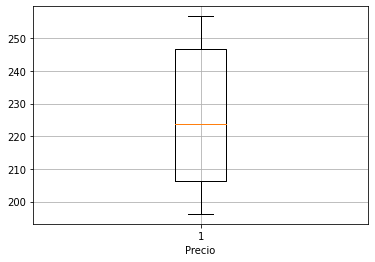

In [57]:
plt.boxplot(compra.Precio[compra.IdProducto == 42931].dropna())#, bins= 15)
plt.xlabel('Precio')
plt.grid()
plt.show()

In [58]:
compra[compra.Precio.isnull() == True]

,IdCompra,Fecha,Fecha_Año,Fecha_Mes,Fecha_Periodo,IdProducto,Cantidad,Precio,IdProveedor
26,27,1/30/2015,2015,1,201501,42941,6,NaN,2
64,65,1/30/2015,2015,1,201501,42810,4,NaN,3
68,69,1/30/2015,2015,1,201501,42815,11,NaN,7
72,73,1/30/2015,2015,1,201501,42737,2,NaN,6
84,85,1/30/2015,2015,1,201501,42887,11,NaN,3
...,...,...,...,...,...,...,...,...,...
11419,11420,12/25/2020,2020,12,202012,42866,4,NaN,1
11425,11426,12/25/2020,2020,12,202012,42874,7,NaN,11
11437,11438,12/25/2020,2020,12,202012,42890,2,NaN,2
11523,11524,12/25/2020,2020,12,202012,42870,7,NaN,6


Conclusiones "Compra"

In [59]:
# Valores nulos en el precio que pueden ser rellenados usando la media del precio para el IdProducto
# outlayers que pueden ser detectados usando los rangos intercuartiles para la columna precio

In [60]:
# Detectamos si hay ventas duplicadas
compra[compra.IdCompra.duplicated()]

,IdCompra,Fecha,Fecha_Año,Fecha_Mes,Fecha_Periodo,IdProducto,Cantidad,Precio,IdProveedor


Analisis "Provedores"

In [61]:
nulls[nulls.Tabla == 'Proveedores.csv']

,index,Column,Non-Null,Dtype,Entries,Tabla,Porcentaje
38,0,IDProveedor,14,int64,14,Proveedores.csv,1.000000
39,1,Nombre,12,object,14,Proveedores.csv,0.857143
40,2,Address,14,object,14,Proveedores.csv,1.000000
41,3,City,14,object,14,Proveedores.csv,1.000000
42,4,State,14,object,14,Proveedores.csv,1.000000
43,5,Country,14,object,14,Proveedores.csv,1.000000
44,6,departamen,14,object,14,Proveedores.csv,1.000000


In [62]:
archivos

['Clientes.csv',
 'Compra.csv',
 'Gasto.csv',
 'Localidades.csv',
 'Proveedores.csv',
 'Sucursales.csv',
 'TiposDeGasto.csv',
 'Venta.csv']

In [63]:
proveedores = data[4]

In [64]:
proveedores.head()

,IDProveedor,Nombre,Address,City,State,Country,departamen
0,1,NaN,BEREGUESTEIN 36,AVELLANEDA,BUENOS AIRES,ARGENTINA,AVELLANEDA
1,2,San Cirano,ALBERTI 965,CORONEL BRANDSEN,BUENOS AIRES,ARGENTINA,BRANDSEN
2,3,Bell S.A.,MORENO 331,CAMPANA,BUENOS AIRES,ARGENTINA,CAMPANA
3,4,Rivero Insumos,PTE. PERON 3872,VALENTIN ALSINA,BUENOS AIRES,ARGENTINA,LANUS
4,5,Laprida Computacion,AVDA. PEDRO PEREYRA 1339,LAPRIDA,BUENOS AIRES,ARGENTINA,LAPRIDA


In [65]:
proveedores[proveedores.IDProveedor.duplicated() == True]

,IDProveedor,Nombre,Address,City,State,Country,departamen


In [66]:
proveedores[proveedores.Nombre.duplicated() == True]

,IDProveedor,Nombre,Address,City,State,Country,departamen
7,8,NaN,SANTA ROSA 1564,CORDOBA,CORDOBA,ARGENTINA,CAPITAL
10,11,Via Chile Containers,VICEALTE O CONNOR 847,SAN CARLOS DE BARILOCHE,RIO NEGRO,ARGENTINA,BARILOCHE


In [67]:
proveedores[proveedores.Nombre == 'Via Chile Containers']

,IDProveedor,Nombre,Address,City,State,Country,departamen
8,9,Via Chile Containers,JUAN B. JUSTO 415,MENDOZA,MENDOZA,ARGENTINA,CAPITAL
10,11,Via Chile Containers,VICEALTE O CONNOR 847,SAN CARLOS DE BARILOCHE,RIO NEGRO,ARGENTINA,BARILOCHE


In [68]:
proveedores[proveedores.Address.duplicated() == True]

,IDProveedor,Nombre,Address,City,State,Country,departamen
7,8,NaN,SANTA ROSA 1564,CORDOBA,CORDOBA,ARGENTINA,CAPITAL


In [69]:
proveedores[proveedores.Address == 'SANTA ROSA 1564']

,IDProveedor,Nombre,Address,City,State,Country,departamen
6,7,Fletes y Logistica,SANTA ROSA 1564,CORDOBA,CORDOBA,ARGENTINA,CAPITAL
7,8,NaN,SANTA ROSA 1564,CORDOBA,CORDOBA,ARGENTINA,CAPITAL


In [70]:
proveedores[proveedores.Nombre.isnull() == True]

,IDProveedor,Nombre,Address,City,State,Country,departamen
0,1,NaN,BEREGUESTEIN 36,AVELLANEDA,BUENOS AIRES,ARGENTINA,AVELLANEDA
7,8,NaN,SANTA ROSA 1564,CORDOBA,CORDOBA,ARGENTINA,CAPITAL


Conclusiones de "Proveedores"

In [71]:
# Existe un duplicado, con el nombre 'Fletes y Logistica'

Analisis "Venta"

In [72]:
archivos

['Clientes.csv',
 'Compra.csv',
 'Gasto.csv',
 'Localidades.csv',
 'Proveedores.csv',
 'Sucursales.csv',
 'TiposDeGasto.csv',
 'Venta.csv']

In [73]:
venta = data[-1]

In [74]:
venta.head()

,IdVenta,Fecha,Fecha_Entrega,IdCanal,IdCliente,IdSucursal,IdEmpleado,IdProducto,Precio,Cantidad
0,1,2018-03-09,2018-03-17,3,969,13,1674,42817,813.12,2.0
1,2,2018-12-28,2018-12-29,2,884,13,1674,42795,543.18,3.0
2,3,2016-03-28,2016-03-31,2,1722,13,1674,42837,430.32,1.0
3,4,2017-10-23,2017-10-24,3,2876,13,1674,42834,818.84,2.0
4,5,2017-11-22,2017-11-25,2,678,13,1674,42825,554.18,3.0


In [75]:
nulls[nulls.Tabla == 'Venta.csv']

,index,Column,Non-Null,Dtype,Entries,Tabla,Porcentaje
55,0,IdVenta,46180,int64,46180,Venta.csv,1.000000
56,1,Fecha,46180,object,46180,Venta.csv,1.000000
57,2,Fecha_Entrega,46180,object,46180,Venta.csv,1.000000
58,3,IdCanal,46180,int64,46180,Venta.csv,1.000000
59,4,IdCliente,46180,int64,46180,Venta.csv,1.000000
60,5,IdSucursal,46180,int64,46180,Venta.csv,1.000000
61,6,IdEmpleado,46180,int64,46180,Venta.csv,1.000000
62,7,IdProducto,46180,int64,46180,Venta.csv,1.000000
63,8,Precio,45260,float64,46180,Venta.csv,0.980078
64,9,Cantidad,45296,float64,46180,Venta.csv,0.980858


In [76]:
venta[venta.Precio.isnull() == True]

,IdVenta,Fecha,Fecha_Entrega,IdCanal,IdCliente,IdSucursal,IdEmpleado,IdProducto,Precio,Cantidad
85,86,2015-03-17,2015-03-20,3,3159,13,1674,42839,NaN,2.0
113,114,2018-10-08,2018-10-13,3,1868,13,1674,42820,NaN,3.0
180,181,2016-11-03,2016-11-08,3,102,13,1674,42964,NaN,3.0
199,200,2019-07-10,2019-07-15,1,564,13,1674,43012,NaN,3.0
223,224,2020-03-24,2020-03-29,2,3011,13,1674,43029,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...
45901,47229,2020-11-19,2020-11-27,2,3035,10,2557,43027,NaN,2.0
46026,47401,2020-11-21,2020-11-23,2,2687,9,2988,42791,NaN,3.0
46118,47526,2020-11-27,2020-12-06,1,1824,5,1310,42791,NaN,2.0
46122,47530,2020-11-27,2020-11-30,2,656,12,2869,43018,NaN,1.0


Conclusiones venta

In [77]:
# Existen valores nulos en la cantidad que no pueden ser encontrados, representan unicamente el 2% de los datos por lo que no lo considero critico
# Existen valores nulos en el precio que pueden ser rellenados con la media del precio para el Id del producto.
# Deteccion de outlayers con el rango intercuartil en el Precio

Verificando si alguna tabla tiene duplicados

In [78]:
for idx, frame in enumerate(data):
    d = frame[frame.duplicated() == True].shape[0]
    print("Tabla:   "+archivos[idx]+ "      Duplicados:    ",d)

Tabla:   Clientes.csv      Duplicados:     0
Tabla:   Compra.csv      Duplicados:     0
Tabla:   Gasto.csv      Duplicados:     0
Tabla:   Localidades.csv      Duplicados:     0
Tabla:   Proveedores.csv      Duplicados:     0
Tabla:   Sucursales.csv      Duplicados:     0
Tabla:   TiposDeGasto.csv      Duplicados:     0
Tabla:   Venta.csv      Duplicados:     0
